## As a data scientist, I want to build and evaluate multiple classification models on the MNIST dataset, So that I can compare their performance and understand their strengths and weaknesses.

### load dataset

In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True,)
print(X.shape, y.shape)

(70000, 784) (70000,)


Loading MNIST dataset...

Training Logistic Regression...
Accuracy: 0.9210
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.95      0.97      0.96      1575
           2       0.93      0.90      0.91      1398
           3       0.90      0.89      0.89      1428
           4       0.93      0.92      0.93      1365
           5       0.88      0.87      0.88      1263
           6       0.94      0.96      0.95      1375
           7       0.93      0.94      0.94      1459
           8       0.89      0.88      0.89      1365
           9       0.90      0.89      0.90      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



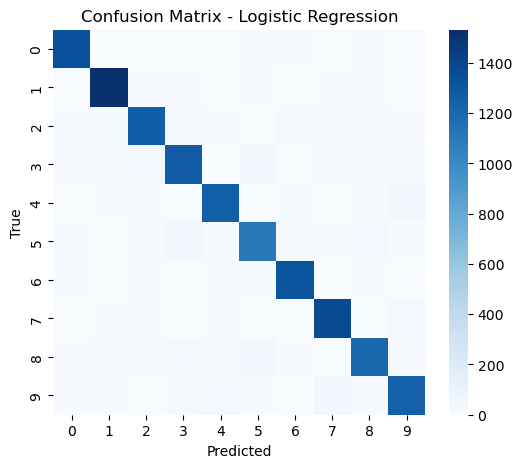


Training SVM...
Accuracy: 0.9791
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1381
           1       0.99      0.99      0.99      1575
           2       0.97      0.98      0.98      1398
           3       0.98      0.97      0.98      1428
           4       0.98      0.97      0.98      1365
           5       0.98      0.98      0.98      1263
           6       0.98      0.99      0.99      1375
           7       0.98      0.98      0.98      1459
           8       0.98      0.98      0.98      1365
           9       0.97      0.97      0.97      1391

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



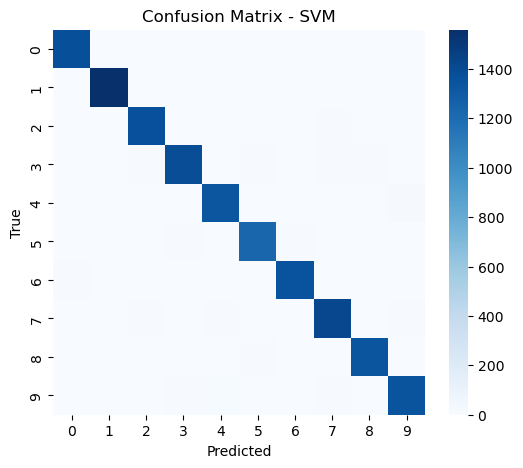


Training Decision Tree...
Accuracy: 0.8743
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1381
           1       0.95      0.96      0.95      1575
           2       0.86      0.85      0.85      1398
           3       0.85      0.84      0.85      1428
           4       0.87      0.87      0.87      1365
           5       0.83      0.83      0.83      1263
           6       0.90      0.89      0.89      1375
           7       0.91      0.91      0.91      1459
           8       0.83      0.81      0.82      1365
           9       0.83      0.83      0.83      1391

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



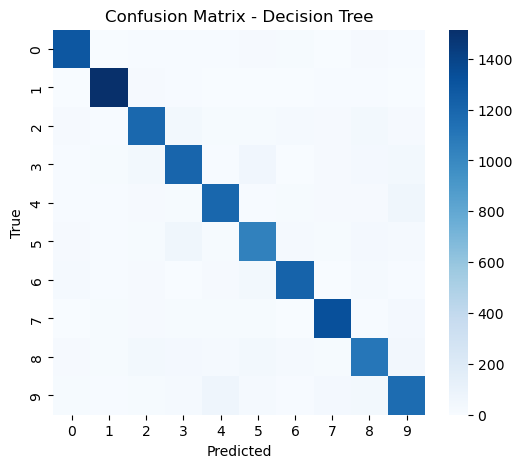


Training Random Forest...
Accuracy: 0.9672
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.98      0.98      0.98      1575
           2       0.96      0.97      0.97      1398
           3       0.96      0.96      0.96      1428
           4       0.97      0.96      0.96      1365
           5       0.97      0.96      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.97      0.97      0.97      1459
           8       0.96      0.96      0.96      1365
           9       0.94      0.94      0.94      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



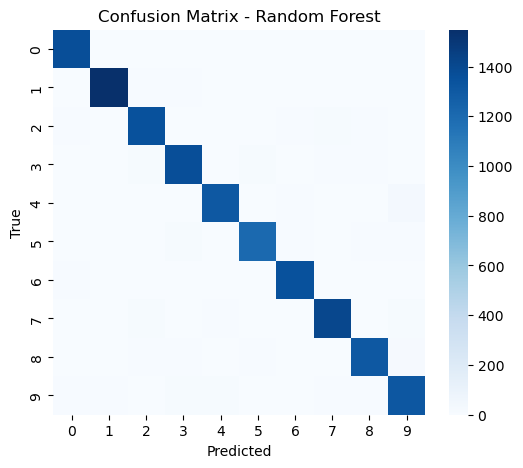


Training XGBoost...


C:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:05:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1381
           1       0.98      0.99      0.99      1575
           2       0.98      0.98      0.98      1398
           3       0.98      0.97      0.97      1428
           4       0.98      0.97      0.97      1365
           5       0.98      0.97      0.98      1263
           6       0.98      0.98      0.98      1375
           7       0.98      0.98      0.98      1459
           8       0.97      0.97      0.97      1365
           9       0.96      0.96      0.96      1391

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



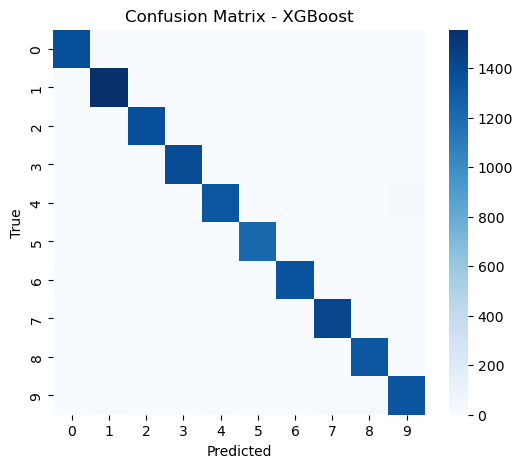

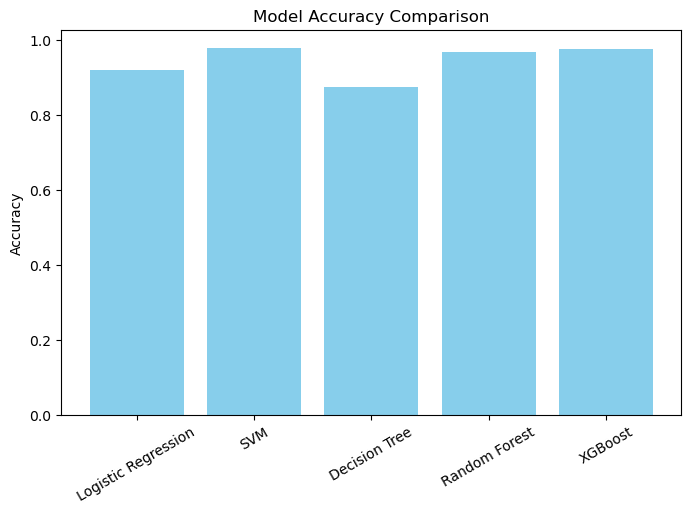

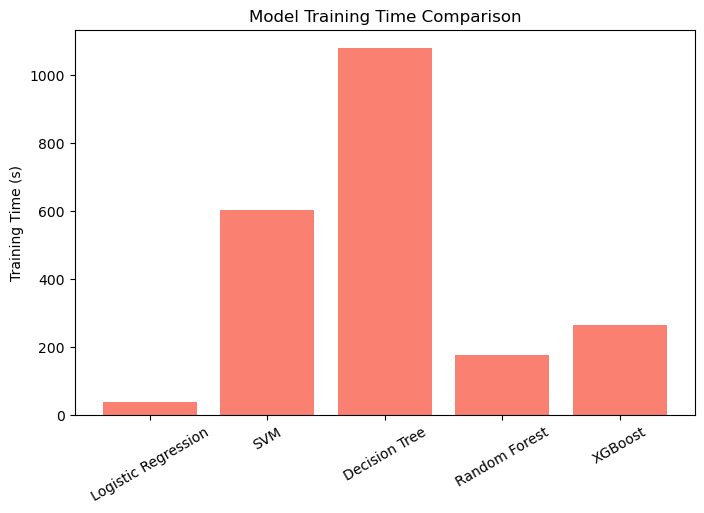

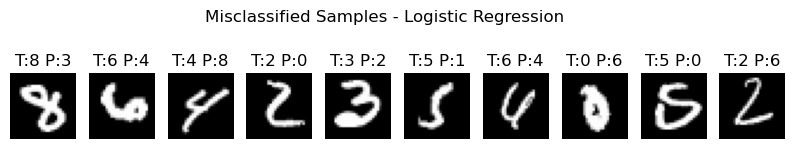

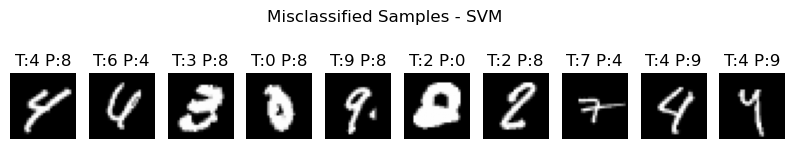

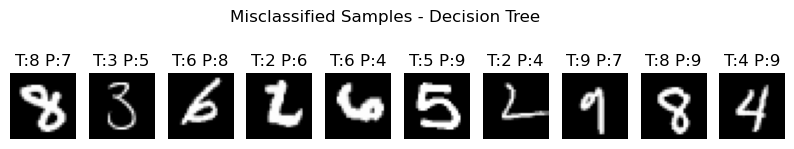

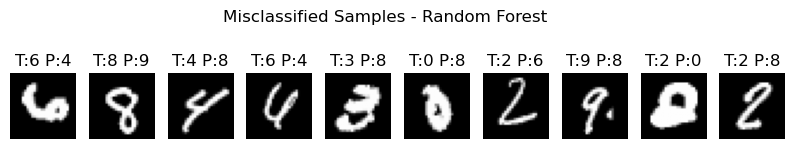

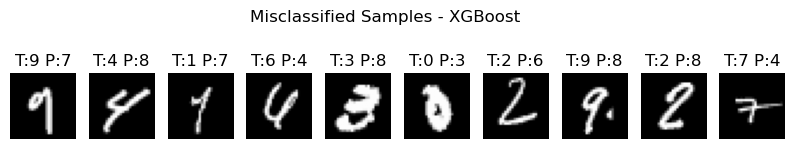

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import time

print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Normalize pixel values
X = X / 255.0
y = y.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}
misclassified_samples = {}


# Training & Evaluation

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    results[name] = {"accuracy": acc, "time": train_time}

    # Misclassified samples
    mis_idx = np.where(y_test != y_pred)[0][:10]  # first 10 misclassified
    misclassified_samples[name] = (X_test[mis_idx], y_test[mis_idx], y_pred[mis_idx])

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, cmap="Blues", annot=False, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

summary = {m: results[m]["accuracy"] for m in results}

plt.figure(figsize=(8,5))
plt.bar(summary.keys(), summary.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()

# Training time comparison
plt.figure(figsize=(8,5))
plt.bar(results.keys(), [results[m]["time"] for m in results], color='salmon')
plt.ylabel("Training Time (s)")
plt.title("Model Training Time Comparison")
plt.xticks(rotation=30)
plt.show()

##visullazition 

for model_name, (images, true_labels, pred_labels) in misclassified_samples.items():
    plt.figure(figsize=(10,2))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i].reshape(28,28), cmap="gray")
        plt.title(f"T:{true_labels[i]} P:{pred_labels[i]}")
        plt.axis("off")
    plt.suptitle(f"Misclassified Samples - {model_name}")
    plt.show()
